In [1]:
import pandas as pd
import numpy as np
import re
import checkcheck   # :D
import matplotlib.pyplot as plt

In [2]:
attacks = pd.read_csv('../attacks.csv', engine='python')

In [3]:
checkcheck.check_df(attacks)

Shape is: (25723, 24),

The names for the columns:
Index(['Case Number', 'Date', 'Year', 'Type', 'Country', 'Area', 'Location',
       'Activity', 'Name', 'Sex ', 'Age', 'Injury', 'Fatal (Y/N)', 'Time',
       'Species ', 'Investigator or Source', 'pdf', 'href formula', 'href',
       'Case Number.1', 'Case Number.2', 'original order', 'Unnamed: 22',
       'Unnamed: 23'],
      dtype='object')
The following information is based on the dataframe row's lenght: 6302

#1. Column Case Number has 8702 rows that are not NA and 65.99999999999999% of missing data.
#2. Column Date has 6302 rows that are not NA and 76.0% of missing data.
#3. Column Year has 6300 rows that are not NA and 76.0% of missing data.
#4. Column Type has 6298 rows that are not NA and 76.0% of missing data.
#5. Column Country has 6252 rows that are not NA and 76.0% of missing data.
#6. Column Area has 5847 rows that are not NA and 77.0% of missing data.
#7. Column Location has 5762 rows that are not NA and 78.0% of missin

In [4]:
attacks.head()

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,...,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0,NaN,NaN
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,...,NaN,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302.0,NaN,NaN
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,...,NaN,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301.0,NaN,NaN
3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,...,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300.0,NaN,NaN
4,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,...,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299.0,NaN,NaN


### There seem to be some columns that could be removed.
### That is solved by answering the question:
## If I were a seafarer, would that be of any use to me?

### At first glance, Name of the victim is no good, also all of:
    # 'Investigator or Source', 'pdf', 'href formula',
    # 'href','Case Number.1', 'Case Number.2', 'original order',
    # 'Unnamed: 22', 'Unnamed: 23'
### So we are going to dive into what info could they provide a seafarer

In [5]:
attacks[['Name','Investigator or Source', 'pdf', 'href formula','href']].head()

,Name,Investigator or Source,pdf,href formula,href
0,Julie Wolfe,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...
1,Adyson McNeely,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...
2,John Denges,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...
3,male,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...
4,Gustavo Ramos,A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...


Due to the focus of this data tidying, it seems as if the information above wouldn't be of much practical use for a fisherman, a pirate or someone working at an oil rig. So it's not going to be shown as this exercise advances.
However, it has to be noted that this information could be used by organizations like Coast Guard, cuatic competition clubs and other investigators.

In [6]:
attacks[['Case Number.1', 'Case Number.2', 'original order']].head()

,Case Number.1,Case Number.2,original order
0,2018.06.25,2018.06.25,6303.0
1,2018.06.18,2018.06.18,6302.0
2,2018.06.09,2018.06.09,6301.0
3,2018.06.08,2018.06.08,6300.0
4,2018.06.04,2018.06.04,6299.0


It looks like this columns may have something to do with the first three columns of the dataset, which are: 'Case Number', 'Date', 'Year', so let's check it out.

In [7]:
attacks[['Case Number.1', 'Case Number.2', 'original order','Case Number', 'Date', 'Year']].sample(42)

,Case Number.1,Case Number.2,original order,Case Number,Date,Year
8949,NaN,NaN,NaN,NaN,NaN,NaN
3387,1970.08.02,1970.08.02,2916.0,1970.08.02,02-Aug-1970,1970.0
23252,NaN,NaN,NaN,NaN,NaN,NaN
24969,NaN,NaN,NaN,NaN,NaN,NaN
10236,NaN,NaN,NaN,NaN,NaN,NaN
11921,NaN,NaN,NaN,NaN,NaN,NaN
17635,NaN,NaN,NaN,NaN,NaN,NaN
3330,1972.06.26.b,1972.06.26.b,2973.0,1972.06.26.b,Reported 26-Jun-1972,1972.0
15662,NaN,NaN,NaN,NaN,NaN,NaN
6930,NaN,NaN,NaN,0,NaN,NaN


By using the .sample function, it can be seen the columns ['Case Number.1', 'Case Number.2', 'original order','Case Number'] is duplicated and not useful to the cause.
#### So far, we are going to remove the columns:
    'Case Number.1',
    'Case Number.2',
    'original order',
    'Case Number',
    'Investigator or Source',
    'pdf',
    'href formula',
    'href'
#### But we are keeping:
    'Date'
    'Year'

In [8]:
attacks['Unnamed: 22'].value_counts()

stopped here    1
Name: Unnamed: 22, dtype: int64

In [9]:
attacks['Unnamed: 23'].value_counts()

Teramo             1
change filename    1
Name: Unnamed: 23, dtype: int64

#### Upon further investigation of the data, it can be appreciated that columns 
    'Unnamed: 22', 'Unnamed: 23'
#### are also not useful for this exercise and hence will be removed.

#### We began with 24 such columns:
    'Case Number',          'Date',
    'Year',                 'Type',
    'Country',              'Area',
    'Location',             'Activity',
    'Name',                 'Sex ',
    'Age',                  'Injury',
    'Fatal (Y/N)',          'Time',
    'Species ',             'Investigator or Source',
    'pdf',                  'href formula',
    'href',                 'Case Number.1',
    'Case Number.2',        'original order',
    'Unnamed: 22',          'Unnamed: 23'
#### After exploring some of them and their contained data, we are left with the following columns:
    'Date',                 'Time',
    'Type',                 'Country',
    'Area',                 'Location',
    'Activity',             'Age',
    'Sex ',                 'Fatal (Y/N)',
    'Injury',               'Species ',
                   

In [10]:
sub1 = attacks[['Date','Type','Country','Area','Location','Activity','Age','Sex ','Fatal (Y/N)','Injury','Species ','Time']]
sub1.head()

,Date,Type,Country,Area,Location,Activity,Age,Sex,Fatal (Y/N),Injury,Species,Time
0,25-Jun-2018,Boating,USA,California,"Oceanside, San Diego County",Paddling,57,F,N,"No injury to occupant, outrigger canoe and pad...",White shark,18h00
1,18-Jun-2018,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,11,F,N,Minor injury to left thigh,NaN,14h00 -15h00
2,09-Jun-2018,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,48,M,N,Injury to left lower leg from surfboard skeg,NaN,07h45
3,08-Jun-2018,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,NaN,M,N,Minor injury to lower leg,2 m shark,NaN
4,04-Jun-2018,Provoked,MEXICO,Colima,La Ticla,Free diving,NaN,M,N,Lacerations to leg & hand shark PROVOKED INCIDENT,"Tiger shark, 3m",NaN


In [11]:
sub1[['Type','Location','Activity','Injury','Species ','Time']].head()

,Type,Location,Activity,Injury,Species,Time
0,Boating,"Oceanside, San Diego County",Paddling,"No injury to occupant, outrigger canoe and pad...",White shark,18h00
1,Unprovoked,"St. Simon Island, Glynn County",Standing,Minor injury to left thigh,NaN,14h00 -15h00
2,Invalid,"Habush, Oahu",Surfing,Injury to left lower leg from surfboard skeg,NaN,07h45
3,Unprovoked,Arrawarra Headland,Surfing,Minor injury to lower leg,2 m shark,NaN
4,Provoked,La Ticla,Free diving,Lacerations to leg & hand shark PROVOKED INCIDENT,"Tiger shark, 3m",NaN


In [12]:
type_missing=sub1['Type'].value_counts().sum()/len(sub1['Type'])
print(f'Regarding the type of attack, there is a lot of information missing, \nwhich is in the order of {(1-type_missing)*100}%')

Regarding the type of attack, there is a lot of information missing, 
which is in the order of 75.51607510788011%


# Preparing to drop by row


#### It can also be said that a significant percentage of attacks are not provoked, thus any other value than "Unprovoked" or "Provoked" will be replaced by "Unconfirmed"

In [13]:
sub1['Type'] = attacks['Type'].apply(
    lambda x: 'Provoked' 
    if x == 'Provoked' 
    else ('Unprovoked' 
          if x == 'Unprovoked' 
          else np.nan))


<ipython-input-13-915065e974ce>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub1['Type'] = attacks['Type'].apply(


#### Checking to see if values in Type have been successfully converted to NaN where missing.

In [14]:
sub1['Type'].value_counts()

Unprovoked    4595
Provoked       574
Name: Type, dtype: int64

#### Since a lot of Days are missing, it feels more appropiate to keep data ordered by Month and Year

In [15]:
sub1[['Day','Month','Year','drop1','drop2']] = (sub1['Date']
                                        .str
                                        .split('-', expand=True))
sub1.drop(['Day','Date','drop1','drop2'],axis=1,inplace=True)
sub1.head()

c:\users\dxoco\appdata\local\programs\python\python38-32\lib\site-packages\pandas\core\frame.py:2963: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]
c:\users\dxoco\appdata\local\programs\python\python38-32\lib\site-packages\pandas\core\frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,Type,Country,Area,Location,Activity,Age,Sex,Fatal (Y/N),Injury,Species,Time,Month,Year
0,NaN,USA,California,"Oceanside, San Diego County",Paddling,57,F,N,"No injury to occupant, outrigger canoe and pad...",White shark,18h00,Jun,2018
1,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,11,F,N,Minor injury to left thigh,NaN,14h00 -15h00,Jun,2018
2,NaN,USA,Hawaii,"Habush, Oahu",Surfing,48,M,N,Injury to left lower leg from surfboard skeg,NaN,07h45,Jun,2018
3,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,NaN,M,N,Minor injury to lower leg,2 m shark,NaN,Jun,2018
4,Provoked,MEXICO,Colima,La Ticla,Free diving,NaN,M,N,Lacerations to leg & hand shark PROVOKED INCIDENT,"Tiger shark, 3m",NaN,Jun,2018


#### Droping all rows where ALL columns have NaN

In [16]:
sub1.dropna(axis=0, how='all', inplace = True)

<ipython-input-16-736625eb0070>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub1.dropna(axis=0, how='all', inplace = True)


In [17]:
sub1.describe()

,Type,Country,Area,Location,Activity,Age,Sex,Fatal (Y/N),Injury,Species,Time,Month,Year
count,5169,6252,5847,5762,5758,3471,5737,5763,6274,3464,2948,5784,5413
unique,2,212,825,4108,1532,157,6,8,3737,1549,366,167,247
top,Unprovoked,USA,Florida,"New Smyrna Beach, Volusia County",Surfing,17,M,N,FATAL,White shark,Afternoon,Jul,2015
freq,4595,2229,1037,163,971,154,5094,4293,802,163,187,621,141


In [18]:
sub1['Sex']=sub1['Sex ']
sub1['Species']=sub1['Species ']

<ipython-input-18-b23ced50d40d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub1['Sex']=sub1['Sex ']
<ipython-input-18-b23ced50d40d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub1['Species']=sub1['Species ']


In [19]:
sub1.drop(['Sex ','Species '],axis=1,inplace=True)

c:\users\dxoco\appdata\local\programs\python\python38-32\lib\site-packages\pandas\core\frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [20]:
month_list = ['Jan','Feb','Mar','Apr','Jun','Jul','Ago','Sep','Oct','Nov','Dic']
    
sub1['Month'] = sub1['Month'].apply(
    lambda x: x 
    if x in month_list 
    else 'No Data' 
)

<ipython-input-20-344e311e21b6>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub1['Month'] = sub1['Month'].apply(


In [21]:
sub1['Age'] = sub1['Age'].apply(
    lambda x: 'No Data'
    if len(str(x)) > 2
    else x
)

<ipython-input-21-700575b18058>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub1['Age'] = sub1['Age'].apply(


In [39]:
y_n_list=['y','n','Y','N']

sub1['Fatal (Y/N)'] = sub1['Fatal (Y/N)'].apply(
    lambda x: x.upper().strip()
    if x in y_n_list 
    else 'No Data' 
)

<ipython-input-39-e3844b1a778d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub1['Fatal (Y/N)'] = sub1['Fatal (Y/N)'].apply(


In [48]:
m_f_list=['m','f','M','F']

sub1['Sex'] = sub1['Sex'].apply(
    lambda x: x.upper().strip()
    if x in m_f_list 
    else 'No Data' 
)

<ipython-input-48-81ca1a644c25>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub1['Sex'] = sub1['Sex'].apply(


#### now all the remaining data can be easily interpreted

## Finally 
### graphical representation of filtered data

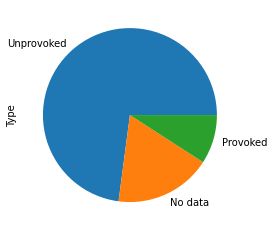

Unprovoked    4595
No data       1133
Provoked       574
Name: Type, dtype: int64


In [57]:
sub1['Type'].fillna('No data',axis=0,inplace=True)
sub1['Type'].value_counts().plot(kind = 'pie', subplots=True)
plt.show()
print(sub1['Type'].value_counts())

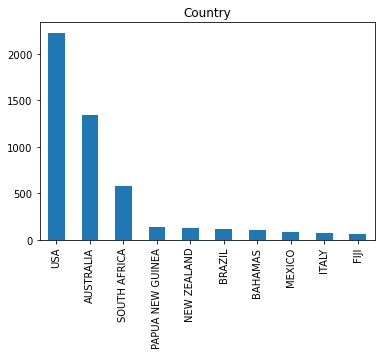

USA                 2229
AUSTRALIA           1338
SOUTH AFRICA         579
PAPUA NEW GUINEA     134
NEW ZEALAND          128
BRAZIL               112
BAHAMAS              109
MEXICO                89
ITALY                 71
FIJI                  62
Name: Country, dtype: int64


In [50]:
graph_data = sub1.copy()
graph_data['Country'].fillna('No data',axis=0,inplace=True)
var1 = graph_data['Country'].value_counts()[0:10]
var1.plot(x = "Country",kind = 'bar', subplots=True)
plt.show()
print(var1)

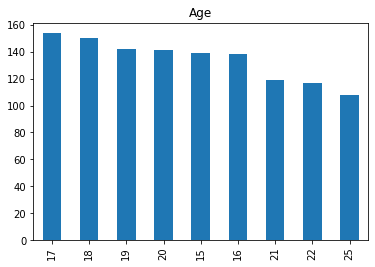

17    154
18    150
19    142
20    141
15    139
16    138
21    119
22    117
25    108
Name: Age, dtype: int64


In [51]:
graph_data_age = sub1.copy()
graph_data_age['Age'].fillna('No data',axis=0,inplace=True)
var1_age = graph_data_age['Age'].value_counts()[1:10]
var1_age.plot(x = "Age",kind = 'bar', subplots=True)
plt.show()
print(var1_age)

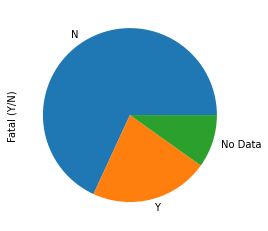

N          4293
Y          1389
No Data     620
Name: Fatal (Y/N), dtype: int64


In [53]:
sub1['Fatal (Y/N)'].fillna('No data',axis=0,inplace=True)
sub1['Fatal (Y/N)'].value_counts().plot(kind = 'pie', subplots=True)
plt.show()
print(sub1['Fatal (Y/N)'].value_counts())

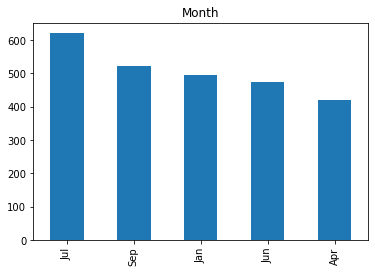

Jul    621
Sep    521
Jan    494
Jun    475
Apr    420
Name: Month, dtype: int64


In [32]:
graph_data_month = sub1.copy()
graph_data_month['Month'].fillna('No data',axis=0,inplace=True)
var1_month = graph_data_month['Month'].value_counts()[1:6]
var1_month.plot(x = "Month", kind = 'bar', subplots=True)
plt.show()
print(var1_month)

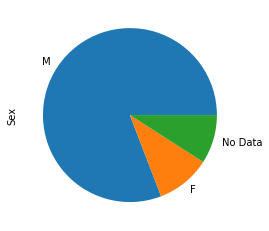

M          5094
F           637
No Data     571
Name: Sex, dtype: int64


In [56]:
sub1['Sex'].fillna('No data',axis=0,inplace=True)
sub1['Sex'].value_counts().plot(kind = 'pie', subplots=True)
plt.show()
print(sub1['Sex'].value_counts())